# K Means Clustering

Tingting Yang

INDE 577 - Data Science and Machine Learning

In this notebook, we will implement the K means clustering for species classification using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). We will first build the K means clustering algorithm. We will also use Principal Component Analysis (PCA) to reduce the dimensions of the dataset, and compare the performance of the K means clustering algorithm before and after PCA.

### Tools

In order to do this, I need the following libraries:

* [matplotlib](http://metplotlib.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA) in [sklearn.decomposition](https://scikit-learn.org/stable/modules/classes.html?highlight=decomposition#module-sklearn.decomposition)

The iris data is loaded from [sklearn.dataset](https://scikit-learn.org/stable/modules/classes.html?highlight=dataset#module-sklearn.datasets).


In [1]:
# Import the necessaty libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA

### Data Exploration

After import the dataset, we simply check the dimension before implementing the PCA.

In [2]:
# Import the dataset
iris = datasets.load_iris()
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
# Check the dimensions before PCA
X = iris.data
y = iris.target
X.shape

(150, 4)

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The X matrix has 4 variables, 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', and 'petal width (cm)'.

We also plot the scatter plot for the first two features.

Text(0.5, 1.0, 'Iris Sepal Length vs. Width (Before PCA)')

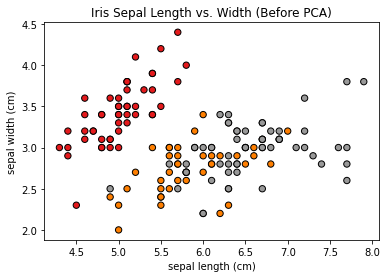

In [5]:
# Plot the scatterplot for the first two features
plt.scatter(X[:, 0], X[:, 1], c=y,
            cmap = plt.cm.Set1,
            edgecolor = "k",
            s = 40)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title("Iris Sepal Length vs. Width (Before PCA)")

### Implement PCA

Next, we implement PCA using the tool, [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA), to reduce the dimension to only two.

In [6]:
# Use PCA to reduce the dimension of the dataset to only 2 dimentions
X_reduced = PCA(n_components = 2).fit_transform(iris.data)
y = iris.target

In [7]:
X_reduced.shape

(150, 2)

After PCA, the dimension is reduced to 2. 

Let's plot the projected points after PCA.

Text(0.5, 1.0, 'Iris Features After PCA')

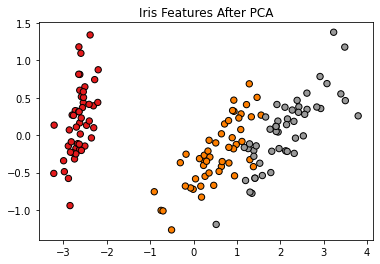

In [8]:
# Plot the features after PCA
plt.scatter(X_reduced[:, 0],
            X_reduced[:, 1],
            c = y,
            cmap = plt.cm.Set1,
            edgecolor = "k",
            s = 40)
plt.title("Iris Features After PCA")

Compare to the scatterplot with only 2 features before PCA, it seems to have better separation after PCA. However, what we see might be wrong. Let's build a K means clustering algorithm to see!

### Build the K Means Clustering Algorithm

#### Initiate K Centroids

Let's try K=2 on the original dataset before PCA.

In [9]:
# Randomly select K starting centroids
k = 2
C = []
for _ in range(k):
    i = np.random.randint(len(X))
    C.append(X[i, :])

In [10]:
# Check the dimension of the centroids
C

[array([6.6, 2.9, 4.6, 1.3]), array([5.1, 3.5, 1.4, 0.2])]

The randomly selected centroids have the same number of features (4 variables) as the original iris dataset.

#### Define Distance between Points

To calculate the Euclidean distance between two points:

$$d(p, q) = \sqrt {\sum_{i=1}^{n}(p_i-q_i)^2}$$

In [11]:
# Define the distance function to calculate Euclidean distance between two points
def distance(v, w):
    return np.sqrt((v - w) @ (v - w))

In [12]:
# Check the distance function between one of the first centroid and the first data point in the dataset
distance(C[0], X[0])

3.749666651850535

#### Define the Assignment Function

This function is to calculate the distance from each point to every centroid, and return the index of the nearest centroid.

In [13]:
# Define Assignment function
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

In [14]:
# Check the Assignment function on the first data point in the dataset
assignment(X[0], C)

1

We can also draw a scatter plot to see the assignment for the first set of centroids.

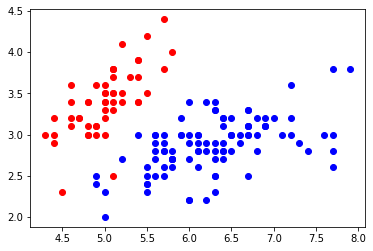

In [15]:
# Scatter plot to show the assignments
for x in X:
    
    # Mark the points assigned to the first cluster in blue
    if assignment(x, C) == 0:
        plt.scatter(x[0], x[1], color = "blue")
        
    # Mark the points assigned to the second cluster in red
    else:
        plt.scatter(x[0], x[1], color = "red")
        
plt.show()

From the scatter plot, we can find that there are a small part of points are assigned to the second cluster. 

Next, we should group up the points assigned to the same cluster, and update the centroids.

#### Group up the Assigned Points

To group up the points that assigned to the same cluster, we define a function names "make_classes".

In [16]:
# Define a function to group up the assigned points
def make_classes(data, Centroids):
    A = dict()
    
    # Make the lists for every centroid separately
    for i in range(len(Centroids)):
        A[i] = []
    
    # Assigned every data points to the class list
    for x in data:
        A[assignment(x, Centroids)].append(x)
        
    return A

In [17]:
# Check the functions
A = make_classes(X, C)
A[0][:5]

[array([7. , 3.2, 4.7, 1.4]),
 array([6.4, 3.2, 4.5, 1.5]),
 array([6.9, 3.1, 4.9, 1.5]),
 array([5.5, 2.3, 4. , 1.3]),
 array([6.5, 2.8, 4.6, 1.5])]

The printed 5 points in consistent to the blue points in the above scatter plot, suggesting that the "make_classes" function works well.

#### Update the Centroids

To update the centroids, we calculate the mean points for every class and move the centroids to the mean points.
$$c_i \rightarrow  \frac {1}{|A_i|}\sum_{x\in A_i} x$$

In [18]:
# Update the centroids
def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    
    # Calculate the mean points for every class
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))
        
    return new_Centroids

Let's check the function!

In [19]:
new_C = new_centroids(X, C)

In [20]:
C

[array([6.6, 2.9, 4.6, 1.3]), array([5.1, 3.5, 1.4, 0.2])]

In [21]:
new_C

[array([6.27373737, 2.87575758, 4.92525253, 1.68181818]),
 array([5.00784314, 3.40980392, 1.49215686, 0.2627451 ])]

The centroids moved! And the new centroids fit our prediction made by looking the scatter plot above. They seem to be located at the center of the clusters. 

Then we can put the functions for algorithm together and try for 4 iterations to see the changes of the assignment and have a intuitive impression on how the K Means algorithm work.

In [22]:
# Define a function to randomly initiate the starting centoids
def initialize_centroids(data, k = 2):
    Centroids = []
    for _ in range(k):
        i = np.random.randint(len(X))
        Centroids.append(X[i, :])
    return Centroids

# Define Assignment function
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

# Define a function to group up the assigned points
def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i] = []
    for x in data:
        A[assignment(x, Centroids)].append(x)       
    return A

# Update the centroids
def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))   
    return new_Centroids

In [23]:
# Set K=3 and Try 4 iterations
k = 3
C0 = initialize_centroids(X, k = k)
C1 = new_centroids(X, C0)
C2 = new_centroids(X, C1)
C3 = new_centroids(X, C2)

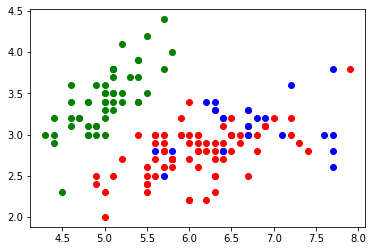

In [24]:
# Scatter plot for the first round assignment with the starting centroids
for x in X:
    if assignment(x, C0) == 0:
        plt.scatter(x[0], x[1], color = "blue")
    elif assignment(x, C0) == 1:
        plt.scatter(x[0], x[1], color = "green")
    else:
        plt.scatter(x[0], x[1], color = "red")

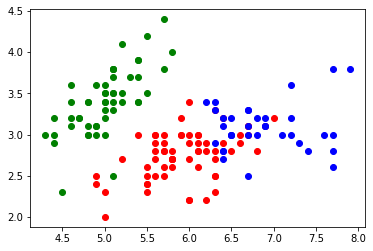

In [25]:
# Scatter plot for the second round assignment with the first updated centroids
for x in X:
    if assignment(x, C1) == 0:
        plt.scatter(x[0], x[1], color = "blue")
    elif assignment(x, C1) == 1:
        plt.scatter(x[0], x[1], color = "green")
    else:
        plt.scatter(x[0], x[1], color = "red")

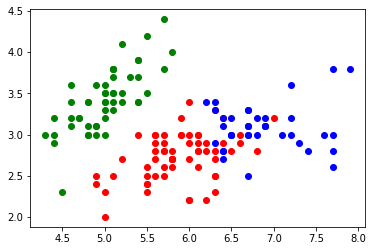

In [26]:
# Scatter plot for the third round assignment with the second updated centroids
for x in X:
    if assignment(x, C2) == 0:
        plt.scatter(x[0], x[1], color = "blue")
    elif assignment(x, C2) == 1:
        plt.scatter(x[0], x[1], color = "green")
    else:
        plt.scatter(x[0], x[1], color = "red")

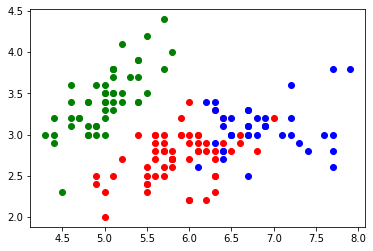

In [27]:
# Scatter plot for the third round assignment with the second updated centroids
for x in X:
    if assignment(x, C3) == 0:
        plt.scatter(x[0], x[1], color = "blue")
    elif assignment(x, C3) == 1:
        plt.scatter(x[0], x[1], color = "green")
    else:
        plt.scatter(x[0], x[1], color = "red")

From the above 4 plots, we can find that some points which are near the bounder of clusters change color when centroids updated.

#### Fitting and Prediction

Then we define the fitting function.

The stop criteria should be set. Once the max iteration is reached or the maximun of the distances between previous centroids and updated centroids is less than epsilon value, the iterations would stop.

We set the defult max iteration at 100 times and the epsilon equal to $0.01$. 

In [28]:
def fit(data, k = 3, max_iterations = 100, epsilon = 0.01):
    C_old = initialize_centroids(X, k = k)
    C_new = new_centroids(data, C_old)  
    
# try to achieve stpe 4 to find the centroids no longer move below:
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0
    while max(centroid_distances) > epsilon and iterations < max_iterations:
        C_old, C_new = C_new, new_centroids(data, C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations +=1
        
    return C_new

#### Define Loss Function

For each $A_i$,
$$L=\frac {1}{2} \sum_{x \in A_i} (c_i-x)^2$$
where $x$ is a data point belonging to the cluster $A_i$, and $c_i$ is the centroid of the cluster $A_i$.

In [44]:
def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(0.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)
        
    return sum(x for x in errors)

So far, the basic of the K Means Clustering algorithm is built. Let's put all the functions together.

In [30]:
# Define a function to randomly initiate the starting centoids
def initialize_centroids(data, k = 3):
    Centroids = []
    for _ in range(k):
        i = np.random.randint(len(X))
        Centroids.append(X[i, :])
    return Centroids

# Define Assignment function
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

# Define a function to group up the assigned points
def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i] = []
    for x in data:
        A[assignment(x, Centroids)].append(x)       
    return A

# Update the centroids
def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))   
    return new_Centroids

# Define the fitting function
def fit(data, k = 3, max_iterations = 100, epsilon = 0.01):
    C_old = initialize_centroids(X, k = k)
    C_new = new_centroids(data, C_old)  
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0
    while max(centroid_distances) > epsilon and iterations < max_iterations:
        C_old, C_new = C_new, new_centroids(data, C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations +=1  
    return C_new

# Define the Loss function
def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(0.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)
        
    return sum(x for x in errors)

In [31]:
# Check the MSE after fitting
C = fit(X)
print(mse_classes(X, C))

39.42783291298865


When we set the K=3, the error is around $40.0$. Then the next question for us is how to choose a suitable K value.

#### Choose the K Value by Elbow Method

Then we use the elbow method to find the optimal K value for this dataset. When we plot the loss function with K values, the elbow point is the optimal K value.

In [32]:
# Fit the model for K from 1 to 6
C1 = fit(X, k = 1)
C2 = fit(X, k = 2)
C3 = fit(X, k = 3)
C4 = fit(X, k = 4)
C5 = fit(X, k = 5)
C6 = fit(X, k = 6)
#C7 = fit(X, k = 7)
C = [C2, C3, C4, C5, C6]

Text(0.5, 1.0, 'K Values vs. MSE')

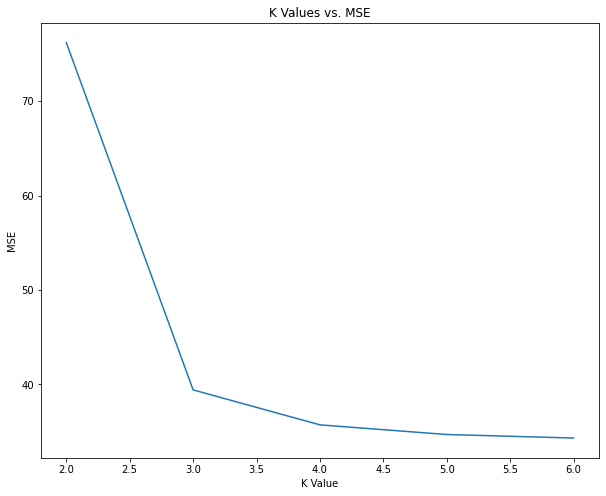

In [33]:
# Plot the loss function with K values
errors = [mse_classes(X, centroids) for centroids in C]
plt.figure(figsize=(10, 8))
plt.plot([i for i in range(2, 7)], errors)
plt.xlabel("K Value")
plt.ylabel("MSE")
plt.title("K Values vs. MSE")

From the plot, K=3 is the elbow point, which is consistent to the original number of the labels in the iris dataset.

---

### Implement K Means Clustering after PCA

Next, let's explore whether the reduction of dimension affect the performance of K Means Clustering.

In [34]:
# Define a function to randomly initiate the starting centoids
def initialize_centroids(data, k = 3):
    Centroids = []
    for _ in range(k):
        i = np.random.randint(len(X_reduced))
        Centroids.append(X_reduced[i, :])
    return Centroids

# Define Assignment function
def assignment(x, Centroids):
    distances = np.array([distance(x, centroid) for centroid in Centroids])
    return np.argmin(distances)

# Define a function to group up the assigned points
def make_classes(data, Centroids):
    A = dict()
    for i in range(len(Centroids)):
        A[i] = []
    for x in data:
        A[assignment(x, Centroids)].append(x)       
    return A

# Update the centroids
def new_centroids(data, Centroids):
    new_Centroids = []
    A = make_classes(data, Centroids)
    for i in range(len(Centroids)):
        new_Centroids.append((1/len(A[i]))*sum(A[i]))   
    return new_Centroids

# Define the fitting function
def fit(data, k = 3, max_iterations = 100, epsilon = 0.01):
    C_old = initialize_centroids(X_reduced, k = k)
    C_new = new_centroids(data, C_old)  
    centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
    iterations = 0
    while max(centroid_distances) > epsilon and iterations < max_iterations:
        C_old, C_new = C_new, new_centroids(data, C_new)
        centroid_distances = [distance(p[0], p[1]) for p in zip(C_old, C_new)]
        iterations +=1  
    return C_new

# Define the Loss function
def mse_classes(data, Centroids):
    errors = []
    A_classes = make_classes(data, Centroids)
    for i, centroid in enumerate(Centroids):
        error = sum(0.5*(centroid - a) @ (centroid - a) for a in A_classes[i])
        errors.append(error)
        
    return sum(x for x in errors)

In [35]:
# Check the MSE after fitting
C = fit(X_reduced)
print(mse_classes(X_reduced, C))

31.90997101100065


The MSE is smaller than the MSE of the model before PCA when K=3, suggesting that after PCA, the K Means Clustering algorithm perform better when K=3.

We can also use the elbow method to find the optimal K value.

In [38]:
# Fit the model for K from 1 to 6
C1 = fit(X_reduced, k = 1)
C2 = fit(X_reduced, k = 2)
C3 = fit(X_reduced, k = 3)
C4 = fit(X_reduced, k = 4)
C5 = fit(X_reduced, k = 5)
C6 = fit(X_reduced, k = 6)
#C7 = fit(X_reduced, k = 7)
C = [C2, C3, C4, C5, C6]

Text(0.5, 1.0, 'K Values vs. MSE')

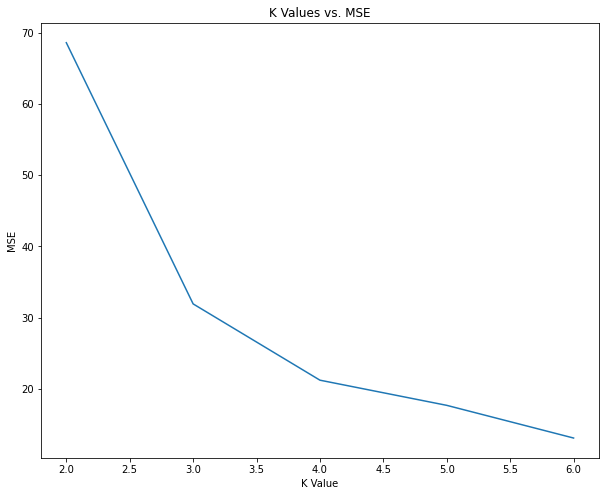

In [39]:
# Plot the loss function with K values
errors = [mse_classes(X_reduced, centroids) for centroids in C]
plt.figure(figsize=(10, 8))
plt.plot([i for i in range(2, 7)], errors)
plt.xlabel("K Value")
plt.ylabel("MSE")
plt.title("K Values vs. MSE")

After PCA, the K=3 is also the elbow point, which is also consistent to the original number of the labels in the iris dataset.

In the meantime, all the MSE values are smaller than the ones before PCA with the same K value. This also means, after PCA, the K Means Clustering algorithm perform better.